## CDC/ATSDR Social Vulnerability Index 2020 

### Introduction

**What is Social Vulnerability?**
Every community must prepare for and respond to hazardous events, whether a natural disaster like a tornado or a disease outbreak, or an anthropogenic event such as a harmful chemical spill. The degree to which a community exhibits certain social conditions, including high poverty, low percentage of vehicle access, or crowded households, may affect that community’s ability to prevent human suffering and financial loss in the event of disaster. These factors describe a community’s social vulnerability.

**What is Social Vulnerability Index?**
SVI indicates the relative vulnerability of every U.S. Census tract. Census tracts are subdivisions of counties for which the Census collects statistical data. SVI ranks the tracts on 16 social factors, including unemployment, racial and ethnic minority status, and disability, and further groups them into four related themes. Thus, each tract receives a ranking for each Census variable and for each of the four themes as well as an overall ranking.

**How can SVI help communities be better prepared for hazardous events?**
SVI provides specific socially and spatially relevant information to help public health officials and local planners better prepare communities to respond to emergency events such as severe weather, floods, disease outbreaks, or chemical exposure.

### Objectives

1. Identify areas of high social vulnerability using the SVI to identify and visualize areas with a high index of social vulnerability. This can help local authorities and planners focus their efforts on preparation and response in these areas.

2. Develop a predictive model using machine learning techniques that relate SVI to the probability of hazardous events, this can assist in the early identification of high-risk areas.

### Variables of interest
STATE	    State name
EP_POV150 	Percentage of persons below 150% poverty estimate
EP_UNEMP 	Unemployment Rate estimate 
EP_NOHSDP 	Percentage of persons with no high school diploma (age 25+) estimate 
EP_AGE65 	Percentage of persons aged 65 and older estimate, 2016-2020 ACS 
EP_AGE17 	Percentage of persons aged 17 and younger estimate, 2016-2020 ACS 
EP_SNGPNT 	Percentage of single-parent households with children under 18 estimate, 2016-2020 ACS 
EP_LIMENG 	Percentage of persons (age 5+) who speak English "less than well" estimate, 2016-2020 ACS 
EP_MOBILE 	Percentage of mobile homes estimate 
EP_NOVEH 	Percentage of households with no vehicle available estimate 
API_NOIN    Percentage of persons withot health insurance

### Hypothesis

**Null Hypothesis** (H0): There is no significant relationship between the independent variables (EP_NOHSDP, EP_UNEMP, EP_AGE65, EP_AGE17, EP_SNGPNT, EP_LIMENG, EP_MOBILE, EP_NOVEH) and the dependent variable (EP_POV150). 

**Alternative Hypothesis** (H1): There is a significant relationship between at least one of the independent variables and the dependent variable. In other words, at least one of the independent variables has a significant impact on the dependent variable.





In [1]:
import pandas as pd

url ='C:\\Users\\52444\\Desktop\\Data Science\\DataScienceCoder\\Data Sets\\SVI_2020_US_county.csv'
dfSVI = pd.read_csv(url)
dfSVI.head()

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
0,1,Alabama,AL,1001,Autauga,1001,"Autauga County, Alabama",594.455838,55639,0,...,1.2,0.3,0.3,0.2,0.0,0.1,2.0,0.7,0.2,0.3
1,1,Alabama,AL,1003,Baldwin,1003,"Baldwin County, Alabama",1589.835294,218289,0,...,0.9,0.2,0.6,0.2,0.0,0.1,1.9,0.4,0.3,0.2
2,1,Alabama,AL,1005,Barbour,1005,"Barbour County, Alabama",885.007618,25026,0,...,0.5,0.1,0.3,0.3,0.0,0.1,1.3,0.6,0.6,0.4
3,1,Alabama,AL,1007,Bibb,1007,"Bibb County, Alabama",622.469288,22374,0,...,0.3,0.4,0.1,0.1,0.0,0.2,0.4,0.3,0.0,0.2
4,1,Alabama,AL,1009,Blount,1009,"Blount County, Alabama",644.890375,57755,0,...,0.4,0.1,0.1,0.1,0.1,0.1,1.8,0.3,0.3,0.4


In [4]:
import requests
import pandas as pd

# Definir la URL de la API
url = "https://api.census.gov/data/timeseries/healthins/sahie?get=NAME,PCTIC_LB90&for=county:*&time=2020&key=7cef749358cb143c0760b345e66bcf67b4623955"

# Hacer la solicitud GET a la API
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Convertir la respuesta a formato JSON
    data = response.json()
    
    # Crear un DataFrame de pandas con los datos
    df = pd.DataFrame(data[1:], columns=data[0])
    
    # Imprimir la tabla
    display(df)
else:
    # Imprimir un mensaje de error si la solicitud no fue exitosa
    print(f"Error en la solicitud. Código de estado: {response.status_code}")

,NAME,PCTIC_LB90,time,state,county
0,"Autauga County, AL",88.1,2020,01,001
1,"Baldwin County, AL",87.9,2020,01,003
2,"Barbour County, AL",83.7,2020,01,005
3,"Bibb County, AL",85.3,2020,01,007
4,"Blount County, AL",85.2,2020,01,009
...,...,...,...,...,...
3138,"Sweetwater County, WY",84.6,2020,56,037
3139,"Teton County, WY",83.6,2020,56,039
3140,"Uinta County, WY",84.4,2020,56,041
3141,"Washakie County, WY",82.1,2020,56,043


In [6]:
df['state'] = df['state'].astype(str).str.lstrip('0')

df['FIPS'] = df['state'] + df['county']

df['API_NOIN'] = 100 - df['PCTIC_LB90'].astype(float)

print(df)


                       NAME PCTIC_LB90  time state county   FIPS  API_NOIN
0        Autauga County, AL       88.1  2020     1    001   1001      11.9
1        Baldwin County, AL       87.9  2020     1    003   1003      12.1
2        Barbour County, AL       83.7  2020     1    005   1005      16.3
3           Bibb County, AL       85.3  2020     1    007   1007      14.7
4         Blount County, AL       85.2  2020     1    009   1009      14.8
...                     ...        ...   ...   ...    ...    ...       ...
3138  Sweetwater County, WY       84.6  2020    56    037  56037      15.4
3139       Teton County, WY       83.6  2020    56    039  56039      16.4
3140       Uinta County, WY       84.4  2020    56    041  56041      15.6
3141    Washakie County, WY       82.1  2020    56    043  56043      17.9
3142      Weston County, WY       85.0  2020    56    045  56045      15.0

[3143 rows x 7 columns]


In [7]:
# Convertir la columna FIPS a tipo string en ambos DataFrames
df['FIPS'] = df['FIPS'].astype(str)
dfSVI['FIPS'] = dfSVI['FIPS'].astype(str)

# Crear el nuevo DataFrame dfINDEX
dfINDEX = pd.merge(df, dfSVI, on='FIPS')

# Seleccionar las columnas deseadas
columns_to_select = ['FIPS', 'API_NOIN', 'EP_POV150', 'EP_UNEMP', 'EP_NOHSDP', 'EP_AGE65', 'EP_AGE17', 'EP_SNGPNT', 'EP_LIMENG', 'EP_MOBILE', 'EP_NOVEH']
dfINDEX = dfINDEX[columns_to_select]

print(dfINDEX)


       FIPS  API_NOIN  EP_POV150  EP_UNEMP  EP_NOHSDP  EP_AGE65  EP_AGE17  \
0      1001      11.9       22.9       2.9       11.3      15.3      23.6   
1      1003      12.1       16.9       3.9        9.5      20.5      21.5   
2      1005      16.3       40.6       6.9       25.3      19.1      20.9   
3      1007      14.7       27.6       7.4       19.1      16.4      20.5   
4      1009      14.8       23.8       5.2       17.2      18.0      23.2   
...     ...       ...        ...       ...        ...       ...       ...   
3138  56037      15.4       18.0       6.2        7.4      12.2      26.1   
3139  56039      16.4       11.9       1.8        5.3      14.9      17.9   
3140  56041      15.6       18.2       4.5        6.9      14.1      28.8   
3141  56043      17.9       19.2       4.2        8.0      21.6      23.8   
3142  56045      15.0       20.3       3.9        6.7      20.3      19.3   

      EP_SNGPNT  EP_LIMENG  EP_MOBILE  EP_NOVEH  
0           7.5        0.

In [8]:
# Verificar si hay valores en blanco en el DataFrame
valores_en_blanco = dfINDEX.isnull().any()
print("Valores en blanco por columna:")
print(valores_en_blanco)


Valores en blanco por columna:
FIPS         False
API_NOIN      True
EP_POV150    False
EP_UNEMP     False
EP_NOHSDP    False
EP_AGE65     False
EP_AGE17     False
EP_SNGPNT    False
EP_LIMENG    False
EP_MOBILE    False
EP_NOVEH     False
dtype: bool


In [9]:
# Filtrar las filas con valores en blanco en la columna API_NOIN
filas_con_valores_en_blanco = dfINDEX[dfINDEX['API_NOIN'].isnull()]
print("Filas con valores en blanco en la columna API_NOIN:")
print(filas_con_valores_en_blanco)


Filas con valores en blanco en la columna API_NOIN:
      FIPS  API_NOIN  EP_POV150  EP_UNEMP  EP_NOHSDP  EP_AGE65  EP_AGE17  \
549  15005       NaN        1.2       0.0        1.4       2.1       0.2   

     EP_SNGPNT  EP_LIMENG  EP_MOBILE  EP_NOVEH  
549        0.0        0.5        0.3       1.3  


In [10]:
# Reemplazar NaN con cero en la columna API_NOIN
dfINDEX['API_NOIN'].fillna(0, inplace=True)
print(dfINDEX)


       FIPS  API_NOIN  EP_POV150  EP_UNEMP  EP_NOHSDP  EP_AGE65  EP_AGE17  \
0      1001      11.9       22.9       2.9       11.3      15.3      23.6   
1      1003      12.1       16.9       3.9        9.5      20.5      21.5   
2      1005      16.3       40.6       6.9       25.3      19.1      20.9   
3      1007      14.7       27.6       7.4       19.1      16.4      20.5   
4      1009      14.8       23.8       5.2       17.2      18.0      23.2   
...     ...       ...        ...       ...        ...       ...       ...   
3138  56037      15.4       18.0       6.2        7.4      12.2      26.1   
3139  56039      16.4       11.9       1.8        5.3      14.9      17.9   
3140  56041      15.6       18.2       4.5        6.9      14.1      28.8   
3141  56043      17.9       19.2       4.2        8.0      21.6      23.8   
3142  56045      15.0       20.3       3.9        6.7      20.3      19.3   

      EP_SNGPNT  EP_LIMENG  EP_MOBILE  EP_NOVEH  
0           7.5        0.

### Descriptive Charts

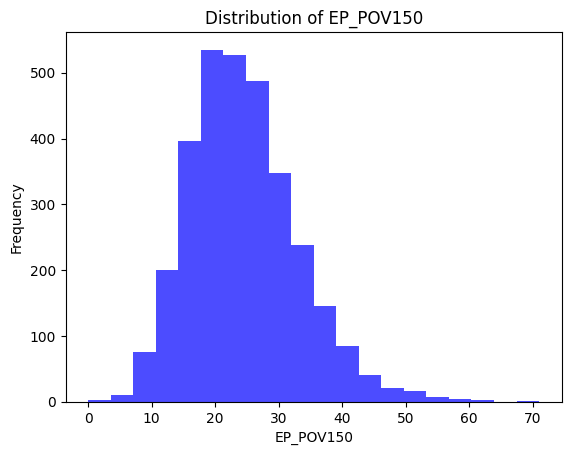

In [2]:
import matplotlib.pyplot as plt

plt.hist(dfSVI['EP_POV150'], bins=20, color='blue', alpha=0.7)
plt.xlabel('EP_POV150')
plt.ylabel('Frequency')
plt.title('Distribution of EP_POV150')
plt.show()


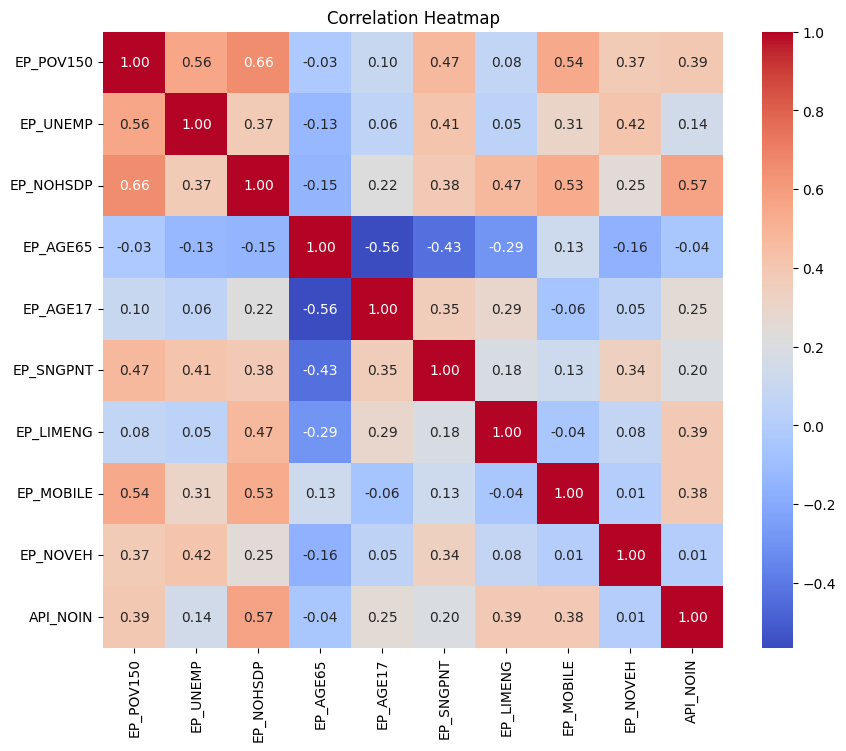

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = dfINDEX[['EP_POV150', 'EP_UNEMP', 'EP_NOHSDP', 'EP_AGE65', 'EP_AGE17', 'EP_SNGPNT', 'EP_LIMENG', 'EP_MOBILE', 'EP_NOVEH', 'API_NOIN']].corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


When looking at the correlation matrix we can see that the variables that have the greatest influence on the persons below 150% poverty EP_POV150 are: EP_UNEMP, EP_NOHSDP, EP_SNGPNT, EP_MOBILE

So we will start by fitting a linear model of EP_POV150 vs EP_NOHSDP which are the parameters showing the strongest correlation.

### LINEAL REGRESION

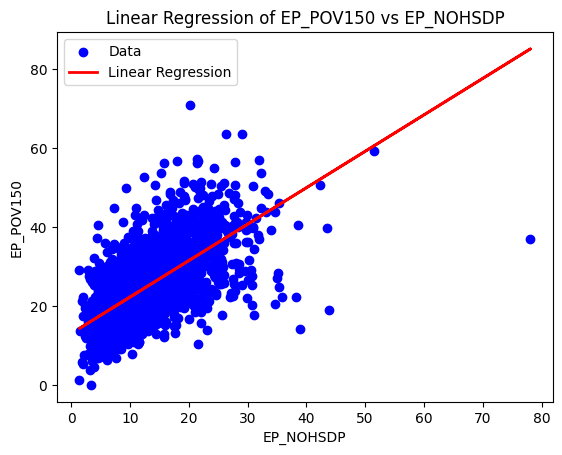

Coeficiente de la pendiente (slope): 0.92
Coeficiente de la intersección (intercept): 13.04
Coeficiente de determinación (R^2): 0.43024924071334925
Error cuadrático medio (MSE): 41.211933159176745


In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Datos de entrada (variables independiente y dependiente)
X = dfINDEX['EP_NOHSDP'].values.reshape(-1, 1)  # Variable independiente (EP_NOHSDP)
y = dfINDEX['EP_POV150'].values  # Variable dependiente (EP_POV150)

# Crear y entrenar el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X, y)

# Realizar predicciones
y_pred = regression_model.predict(X)

# Calcular los coeficientes de la regresión
slope = regression_model.coef_[0]
intercept = regression_model.intercept_

# Visualizar la regresión
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('EP_NOHSDP')
plt.ylabel('EP_POV150')
plt.legend()
plt.title('Linear Regression of EP_POV150 vs EP_NOHSDP')
plt.show()
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f'Coeficiente de la pendiente (slope): {slope:.2f}')
print(f'Coeficiente de la intersección (intercept): {intercept:.2f}')
print("Coeficiente de determinación (R^2):", r2)
print("Error cuadrático medio (MSE):", mse)

In [14]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Variables independientes
X = dfINDEX[['EP_NOHSDP', 'EP_UNEMP', 'EP_LIMENG', 'EP_SNGPNT', 'EP_MOBILE', 'EP_NOVEH', 'EP_AGE65', 'EP_AGE17']]

# Variable dependiente
y = dfINDEX['EP_POV150']

# Configurar los hiperparámetros de XGBoost
params = {
    'objective': 'reg:squarederror',  # Problema de regresión
    'max_depth': 3,                 # Profundidad máxima del árbol
    'n_estimators': 100,             # Número de árboles (estimadores)
    'learning_rate': 0.1            # Tasa de aprendizaje
}
# Configurar la validación cruzada con 5 divisiones (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar listas para almacenar las métricas de rendimiento
mse_scores = []
r2_scores = []

# Realizar la validación cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Crear y ajustar el modelo XGBoost
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)

    # Realizar predicciones en los datos de prueba
    y_pred = model.predict(X_test)

    # Calcular métricas de rendimiento
    mse = mean_squared_error(y_test, y_pred)
    r2 = model.score(X_test, y_test)

    mse_scores.append(mse)
    r2_scores.append(r2)

    # Imprimir los resultados de la validación cruzada
print("Resultados de validación cruzada (MSE):", mse_scores)
print("MSE medio:", np.mean(mse_scores))
print("Resultados de validación cruzada (R^2):", r2_scores)
print("R^2 medio:", np.mean(r2_scores))


Resultados de validación cruzada (MSE): [23.084069814896058, 22.510235352154726, 23.274792214538262, 21.08838915805771, 21.016065917690565]
MSE medio: 22.194710491467465
Resultados de validación cruzada (R^2): [0.6832614300380465, 0.7135464691693509, 0.6874353053909549, 0.7207792800728844, 0.648752863215351]
R^2 medio: 0.6907550695773175


The average MSE performance and the Coefficient of Determination R^2 indicate that the XGBoost model has an overall positive performance based on the KFold cross-validation metrics. The mean MSE of 22.19 shows that the predictions tend to deviate on average by that amount. The average R^2 of about 0.691 suggests that the model explains about 69.1% of the variability in the dependent variable EP_POV150.

The mean MSE of about 22.19 is reasonable, and the MSEs in the test divisions are not significantly higher than in the training divisions. This suggests that there is no clear indication of overfitting or underfitting.

The mean R^2 of about 0.691 indicates that the model explains about 69.1% of the variability in the dependent variable on average, suggesting a reasonable fit.

## CONCLUSION

In the exploration of social vulnerability in the United States using the Social Vulnerability Index (SVI), this study has revealed compelling insights into the factors influencing vulnerability levels. The rejection of the Null Hypothesis (H0) underscores the significant relationships between the percentage of persons below 150% poverty estimate (EP_POV150) and the array of independent variables within the dataset.

Through rigorous analysis and model development, it becomes evident that the XGBoost algorithm stands out as the most effective method for capturing the intricate relationships among the variables. Its superior performance in cross-validation, demonstrated by lower Mean Squared Error (MSE) and higher R-squared (R^2) values, establishes XGBoost as the optimal choice for predicting social vulnerability.

The key takeaway is that understanding and addressing social vulnerability is crucial for effective emergency preparedness and response. The identified influential factors, such as unemployment rates, educational attainment, and demographic composition, should guide targeted interventions to enhance community resilience.

As we conclude this analysis, it is essential to acknowledge the limitations and nuances within the dataset. The complexity of social vulnerability necessitates ongoing research and a nuanced approach to community planning. Future investigations may delve deeper into additional variables and explore more sophisticated modeling techniques to further refine our understanding of social vulnerability dynamics.

In summary, this study contributes valuable insights that can inform decision-makers and community leaders in their efforts to build more resilient and prepared communities, ensuring a more effective response to potential hazards and emergencies.